# MovieLens Analytics and Recommendation System using Apache Spark

The **"MovieLens Analytics and Recommendation System using Apache Spark"** project leverages the power of distributed computing with Apache Spark to analyze and process the MovieLens dataset. This dataset contains user ratings, movie details, and genres, providing a rich foundation for data exploration and insights.

The project is divided into two primary components: data analytics and a recommendation system. The analytics section focuses on uncovering insights such as the top-rated movies, average ratings by genre, user activity, and trends in ratings over time. Visualizations are created to showcase the distribution of ratings and the evolution of genre popularity, offering a comprehensive understanding of user behavior and preferences.

The second component implements a collaborative filtering recommendation system using Spark's MLlib library to generate personalized movie recommendations for users. This showcases Spark’s scalability and efficiency in handling large-scale data processing and machine learning tasks.

The extended features include identifying the most popular movies by year, tracking trends in average ratings over time, and analyzing how genres perform across different periods. The results are saved for further analysis and potential integration into a user-facing application.

This project demonstrates the capabilities of Apache Spark in processing big data, deriving actionable insights, and building scalable machine learning systems, making it a valuable use case for data analytics and recommendation systems in the entertainment industry.

## Setup and Initialization

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("Movie Ratings Analysis") \
    .getOrCreate()

print("Spark session initialized!")


Spark session initialized!


## Load the Dataset

In [ ]:
# Load ratings.csv and movies.csv
ratings = spark.read.csv("ratings.csv", header=True, inferSchema=True)
movies = spark.read.csv("movies.csv", header=True, inferSchema=True)

# Show the schemas
print("Ratings Schema:")
ratings.printSchema()

print("\nMovies Schema:")
movies.printSchema()

Ratings Schema:
root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)


Movies Schema:
root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



## Preview the Data

In [ ]:
# Preview the data
print("Ratings Data:")
ratings.show(5)

print("\nMovies Data:")
movies.show(5)

Ratings Data:
+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|     17|   4.0|944249077|
|     1|     25|   1.0|944250228|
|     1|     29|   2.0|943230976|
|     1|     30|   5.0|944249077|
|     1|     32|   5.0|943228858|
+------+-------+------+---------+
only showing top 5 rows


Movies Data:
+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
+-------+--------------------+--------------------+
only showing top 5 rows



## Data Cleaning

In [ ]:
# Drop null values (if any)
ratings = ratings.dropna()
movies = movies.dropna()

# Check the count after cleaning
print("Number of ratings:", ratings.count())
print("Number of movies:", movies.count())

Number of ratings: 1178117
Number of movies: 87585


## Analysis Tasks

### Top 10 Highest-Rated Movies

In [ ]:
# Calculate the average rating for each movie
avg_ratings = ratings.groupBy("movieId").avg("rating").alias("avg_rating")

# Sort by average rating in descending order and get the top 10
top_movies = avg_ratings.orderBy("avg(rating)", ascending=False).limit(10)

# Join with movies to get titles
top_movies_with_titles = top_movies.join(movies, on="movieId")

print("Top 10 Highest-Rated Movies:")
top_movies_with_titles.select("title", "avg(rating)").show()

Top 10 Highest-Rated Movies:
+--------------------+-----------+
|               title|avg(rating)|
+--------------------+-----------+
|Wrong Side Up (Pr...|        5.0|
|Blue Mountain Sta...|        5.0|
|Sharpe's Enemy (1...|        5.0|
| Plum Blossom (2000)|        5.0|
| Smart Philip (2003)|        5.0|
|Islam: Empire of ...|        5.0|
|São Paulo, Socied...|        5.0|
|Rubber's Lover (1...|        5.0|
|Critical Thinking...|        5.0|
|Explorer: The Las...|        5.0|
+--------------------+-----------+



### Average Rating Per Genre

In [ ]:
from pyspark.sql.functions import explode, split

# Split genres and explode into individual rows
movies_genres = movies.withColumn("genre", explode(split("genres", "\\|")))

# Join movies with ratings and calculate the average rating per genre
genre_ratings = movies_genres.join(ratings, "movieId") \
                             .groupBy("genre") \
                             .avg("rating") \
                             .orderBy("avg(rating)", ascending=False)

print("Average Rating by Genre:")
genre_ratings.show()

Average Rating by Genre:
+------------------+------------------+
|             genre|       avg(rating)|
+------------------+------------------+
|         Film-Noir| 3.940980159092987|
|               War| 3.818027705953869|
|       Documentary| 3.721155089897814|
|             Crime| 3.714365727372299|
|             Drama| 3.705322643061468|
|           Mystery|3.6926881453688485|
|         Animation|3.6317933938708835|
|           Western|3.6226740341928783|
|              IMAX| 3.615350636959556|
|           Musical|3.5860678298748234|
|           Romance| 3.564232883755883|
|          Thriller| 3.556074737520864|
|         Adventure| 3.548707972267288|
|           Fantasy|  3.53358811695082|
|            Sci-Fi|3.5143135204772262|
|            Action|3.5034052119350885|
|          Children|3.4621105425806777|
|            Comedy|3.4504964956825934|
|(no genres listed)|3.3751289989680084|
|            Horror| 3.316824733607463|
+------------------+------------------+



### Top Users by Number of Ratings

In [ ]:
# Find the top users by activity (number of ratings)
user_activity = ratings.groupBy("userId").count().orderBy("count", ascending=False)

print("Top 10 Users by Number of Ratings:")
user_activity.show(10)

Top 10 Users by Number of Ratings:
+------+-----+
|userId|count|
+------+-----+
|  5029| 3893|
|  1048| 3527|
|  4392| 3525|
|  6728| 3389|
|  3367| 3137|
|  3408| 3125|
|  6310| 2946|
|  6471| 2875|
|    28| 2842|
|  7159| 2640|
+------+-----+
only showing top 10 rows



## Visualization

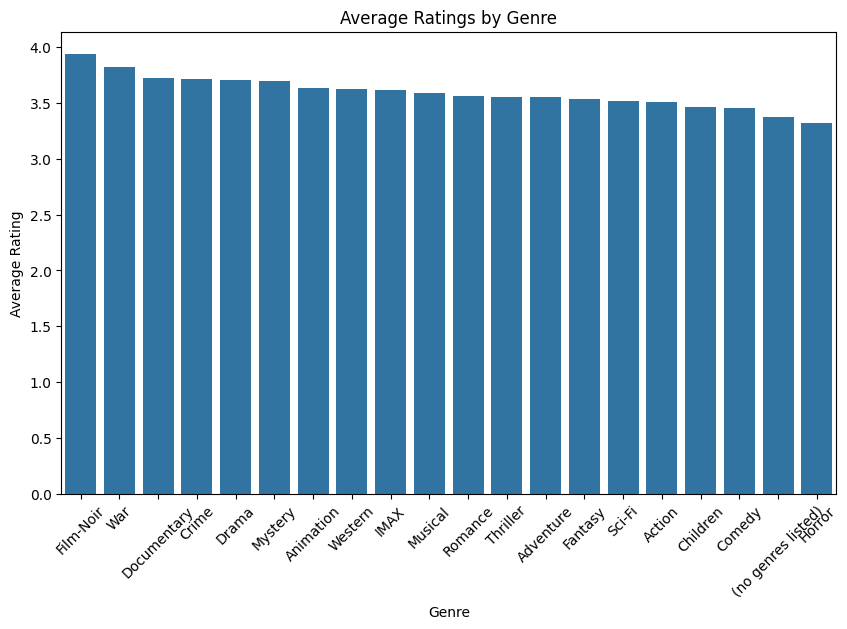

In [ ]:
# Convert genre_ratings to Pandas for visualization
genre_ratings_pd = genre_ratings.toPandas()

# Plot average ratings by genre
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=genre_ratings_pd, x="genre", y="avg(rating)")
plt.title("Average Ratings by Genre")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

## Simple Movie Recommendation System

In [ ]:
from pyspark.ml.recommendation import ALS

# Create the ALS model
als = ALS(userCol="userId", itemCol="movieId", ratingCol="rating",
          nonnegative=True, implicitPrefs=False, maxIter=10, rank=10)

# Fit the model
model = als.fit(ratings)

# Generate top 5 movie recommendations for all users
recommendations = model.recommendForAllUsers(5)

print("Sample Recommendations for Users:")
recommendations.show(5, truncate=False)

Sample Recommendations for Users:
+------+-------------------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                        |
+------+-------------------------------------------------------------------------------------------------------+
|1     |[{115708, 6.4350405}, {96578, 5.1811113}, {92161, 5.1811113}, {209915, 5.1011124}, {161119, 5.1011124}]|
|3     |[{135502, 6.224835}, {210105, 5.4668202}, {151703, 5.3239503}, {6115, 5.3166323}, {209915, 5.251229}]  |
|5     |[{6465, 5.5609527}, {6115, 5.210381}, {115708, 5.097831}, {4382, 5.033504}, {209915, 4.933521}]        |
|6     |[{89898, 7.623511}, {222863, 7.1806064}, {280236, 6.873002}, {6844, 6.6236353}, {254100, 6.613993}]    |
|9     |[{209915, 6.628482}, {161119, 6.628482}, {154069, 6.628482}, {209873, 5.965634}, {72856, 5.965634}]    |
+------+------------------------------------------------------

## Save Results

In [ ]:
# Save genre ratings to a CSV file
genre_ratings.write.csv("genre_ratings_output.csv", header=True)

print("Genre ratings saved to 'genre_ratings_output.csv'")

Genre ratings saved to 'genre_ratings_output.csv'


## Extended Ideas To Implement

### Trends Over Time
Analyze how ratings have changed over time by extracting and grouping by year.

Trends in Average Ratings Over Time:
+----+------------------+
|year|       avg(rating)|
+----+------------------+
|1996|3.5628393635909195|
|1997|3.5475450370893675|
|1998| 3.412261791842718|
|1999|3.6404070775991673|
|2000|3.5985912557829365|
|2001|3.5992025194290647|
|2002| 3.466921718658034|
|2003| 3.481029247657852|
|2004| 3.484309493686587|
|2005| 3.429088798777621|
|2006|3.4044297220057156|
|2007|  3.60602523659306|
|2008| 3.596659707724426|
|2009|3.5629234417344176|
|2010|3.5542833041739565|
|2011| 3.570584168683028|
|2012| 3.692575668461295|
|2013| 3.719946078667373|
|2014| 3.697893772893773|
|2015| 3.583890069845126|
+----+------------------+
only showing top 20 rows



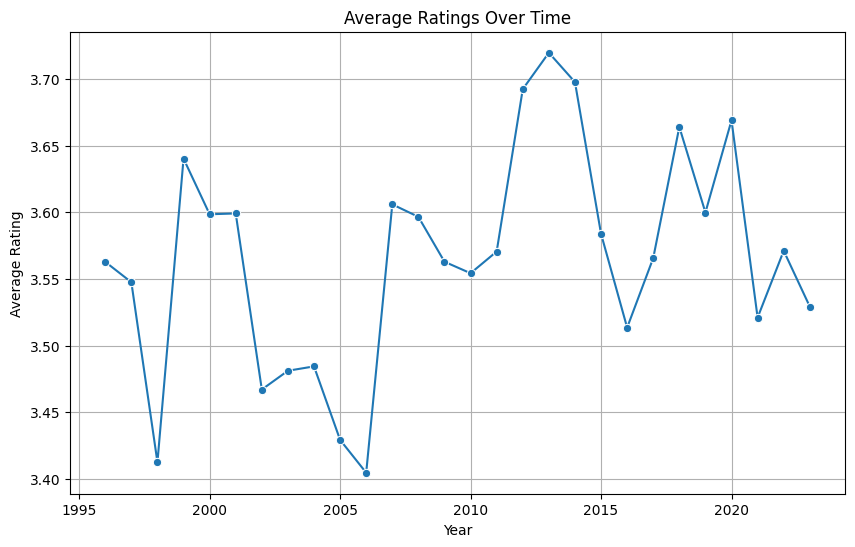

In [ ]:
from pyspark.sql.functions import year, col, to_timestamp

# Extract the year from the timestamp
ratings_with_year = ratings.withColumn("year", year(to_timestamp(col("timestamp"))))

# Calculate the average rating for each year
ratings_trend = ratings_with_year.groupBy("year").avg("rating").orderBy("year")

print("Trends in Average Ratings Over Time:")
ratings_trend.show()

# Visualization of trends over time
ratings_trend_pd = ratings_trend.toPandas()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ratings_trend_pd, x="year", y="avg(rating)", marker="o")
plt.title("Average Ratings Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

### Most Popular Movies Over Time
Identify which movies were the most popular (highest number of ratings) in each year.

In [ ]:
# Group by movie and year, count the number of ratings
movie_popularity = ratings_with_year.groupBy("movieId", "year").count()

# Get the most popular movie for each year
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window_spec = Window.partitionBy("year").orderBy(col("count").desc())

popular_movies_per_year = movie_popularity.withColumn("rank", row_number().over(window_spec)) \
                                          .filter(col("rank") == 1) \
                                          .join(movies, "movieId") \
                                          .select("year", "title", "count")

print("Most Popular Movies by Year:")
popular_movies_per_year.show()

Most Popular Movies by Year:
+----+--------------------+-----+
|year|               title|count|
+----+--------------------+-----+
|1996|       Batman (1989)|  748|
|1997|Independence Day ...|  316|
|1998|      Titanic (1997)|   52|
|1999|Star Wars: Episod...|  163|
|2000|American Beauty (...|  245|
|2001|American Beauty (...|  143|
|2002|Lord of the Rings...|  133|
|2003|Lord of the Rings...|  123|
|2004|Lord of the Rings...|  130|
|2005|Lord of the Rings...|  204|
|2006|Lord of the Rings...|  128|
|2007| Forrest Gump (1994)|  120|
|2008|  Matrix, The (1999)|  153|
|2009|Dark Knight, The ...|  140|
|2010|       Avatar (2009)|  138|
|2011|    Inception (2010)|  107|
|2012|Dark Knight, The ...|   79|
|2013|Shawshank Redempt...|  101|
|2014|Shawshank Redempt...|  105|
|2015|  Matrix, The (1999)|  366|
+----+--------------------+-----+
only showing top 20 rows



### Scaling to Larger Datasets
Enable partitioning for better scalability when handling large datasets.

In [ ]:
# Repartition the ratings DataFrame for distributed processing
ratings_repartitioned = ratings.repartition(10, "movieId")

# Perform the average rating computation with partitioning
avg_ratings_partitioned = ratings_repartitioned.groupBy("movieId").avg("rating")
print("Partitioned Average Ratings Computed Successfully")

Partitioned Average Ratings Computed Successfully


### Collaborative Filtering for Top Recommendations
Create user-based recommendations using Spark MLlib’s ALS.

In [ ]:
# Generate movie recommendations for a specific user (e.g., userId = 1)
user_id = 1
user_recommendations = model.recommendForUserSubset(ratings.filter(col("userId") == user_id), 5)

print(f"Top 5 Recommendations for User {user_id}:")
user_recommendations.show(truncate=False)

# Join with movie titles for clarity
user_recommendations_with_titles = user_recommendations \
    .withColumn("recommendations", explode("recommendations")) \
    .select("userId", col("recommendations.movieId"), col("recommendations.rating")) \
    .join(movies, "movieId") \
    .select("userId", "title", "rating")

print(f"Top 5 Recommendations for User {user_id} (with Titles):")
user_recommendations_with_titles.show(truncate=False)

Top 5 Recommendations for User 1:
+------+-------------------------------------------------------------------------------------------------------+
|userId|recommendations                                                                                        |
+------+-------------------------------------------------------------------------------------------------------+
|1     |[{115708, 6.4350405}, {96578, 5.1811113}, {92161, 5.1811113}, {209915, 5.1011124}, {161119, 5.1011124}]|
+------+-------------------------------------------------------------------------------------------------------+

Top 5 Recommendations for User 1 (with Titles):
+------+--------------------------------------+---------+
|userId|title                                 |rating   |
+------+--------------------------------------+---------+
|1     |Big Snit, The (1985)                  |6.4350405|
|1     |Mr. Freedom (1969)                    |5.1811113|
|1     |Viva (2007)                           |5.1811113|
|1  

### Analyze Ratings Distribution
Visualize how ratings are distributed across all movies.

Ratings Distribution:
+------+------+
|rating| count|
+------+------+
|   0.5| 18591|
|   1.0| 34076|
|   1.5| 18734|
|   2.0| 72763|
|   2.5| 58456|
|   3.0|218624|
|   3.5|156679|
|   4.0|313079|
|   4.5|114104|
|   5.0|173011|
+------+------+



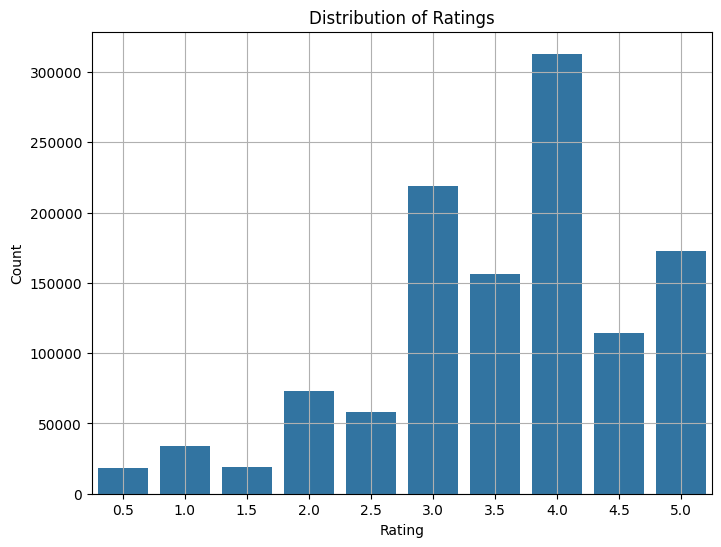

In [ ]:
# Group by rating and count
ratings_distribution = ratings.grsploupBy("rating").count().orderBy("rating")

print("Ratings Distribution:")
ratings_distribution.show()

# Convert to Pandas for visualization
ratings_distribution_pd = ratings_distribution.toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=ratings_distribution_pd, x="rating", y="count")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Average Ratings by Genre Over Time
Combine genres and timestamps to analyze how the popularity of genres has changed over the years.

Average Ratings by Genre Over Time:
+-----------+----+------------------+
|      genre|year|       avg(rating)|
+-----------+----+------------------+
|     Action|1996|3.4527223840466053|
|  Adventure|1996| 3.501590997283663|
|  Animation|1996|3.7209227811598846|
|   Children|1996|3.5105130361648444|
|     Comedy|1996| 3.437095282146161|
|      Crime|1996|3.6468888460797535|
|Documentary|1996| 4.008583690987124|
|      Drama|1996|3.7129455909943716|
|    Fantasy|1996|3.4606695420004105|
|  Film-Noir|1996|             3.616|
|     Horror|1996| 3.542233209723939|
|       IMAX|1996| 3.844252873563218|
|    Musical|1996| 3.685241472475515|
|    Mystery|1996| 3.679531357684356|
|    Romance|1996|3.6164436538015314|
|     Sci-Fi|1996| 3.430415016864643|
|   Thriller|1996| 3.616357191980109|
|        War|1996| 3.962487976915678|
|    Western|1996| 3.598135198135198|
|     Action|1997| 3.480638672366105|
+-----------+----+------------------+
only showing top 20 rows



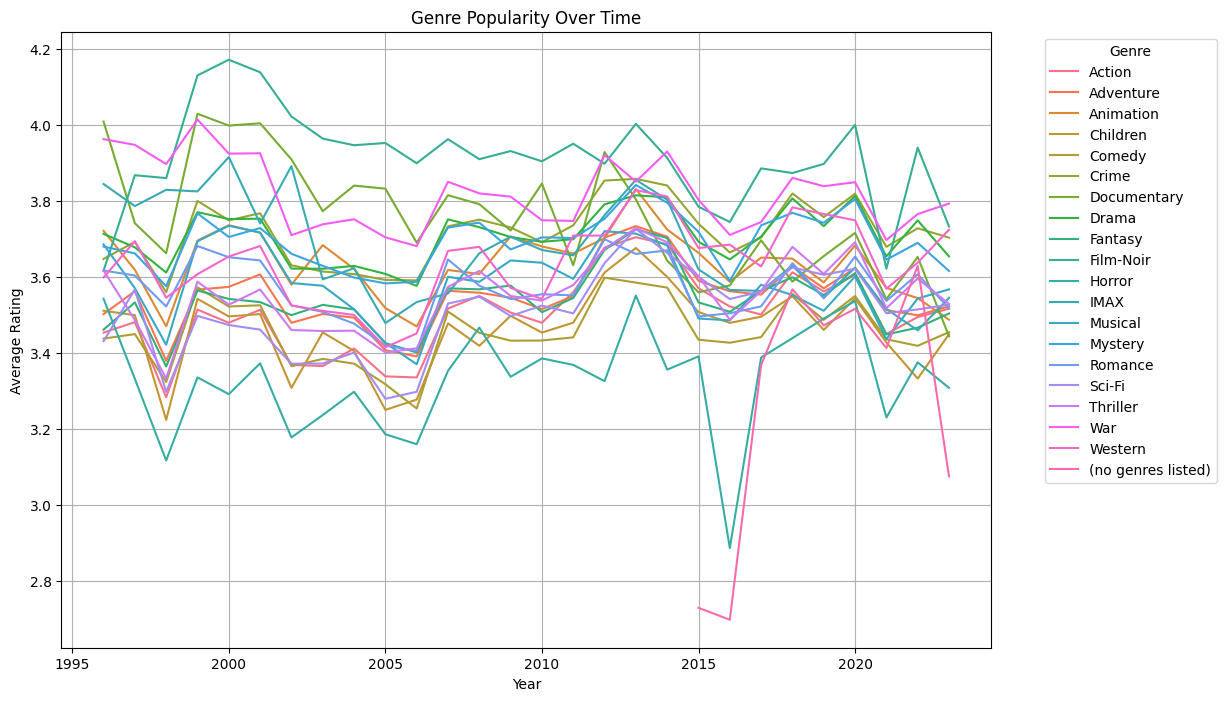

In [ ]:
# Combine genres with ratings and years
genre_ratings_with_year = movies_genres.join(ratings_with_year, "movieId") \
                                       .groupBy("genre", "year") \
                                       .avg("rating") \
                                       .orderBy("year", "genre")

print("Average Ratings by Genre Over Time:")
genre_ratings_with_year.show()

# Visualization
genre_ratings_pd = genre_ratings_with_year.toPandas()

plt.figure(figsize=(12, 8))
sns.lineplot(data=genre_ratings_pd, x="year", y="avg(rating)", hue="genre")
plt.title("Genre Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Genre")
plt.grid(True)
plt.show()

### Save Extended Results
Save all extended outputs to files for further analysis.

In [ ]:
# Save trends and genre ratings over time
ratings_trend.write.csv("ratings_trend.csv", header=True)
popular_movies_per_year.write.csv("popular_movies_per_year.csv", header=True)
genre_ratings_with_year.write.csv("genre_ratings_over_time.csv", header=True)

print("Extended results saved to CSV files!")

Extended results saved to CSV files!
